<a href="https://colab.research.google.com/github/olalekana142/olalekana142/blob/main/human_horse_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
import random
import os
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [4]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Data Preparation 

In [5]:
epochs=50
lr= 1e-3
batch_size =128
data =[]
labels= []

In [6]:
size=224  # Height/Width

# ImageDataGeneration

In [7]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1/255)


In [8]:

test_datagen =ImageDataGenerator(rescale=1/255)
target_size= (size,size)
target_size

(224, 224)

In [9]:
train_generator=train_datagen.flow_from_directory(
directory= '/content/drive/MyDrive/horse-or-human/train',
target_size=target_size,
batch_size=batch_size,
class_mode='binary')
validation_generator =test_datagen.flow_from_directory(directory='/content/drive/MyDrive/horse-or-human/validation',
                                                     target_size=target_size,
                                                     batch_size=batch_size,
                                                     class_mode='binary' )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [11]:
x,y = train_generator.next()

In [12]:
model=tf.keras.Sequential([
tf.keras.layers.Conv2D(32,  (3,3) ,input_shape = ( 224, 224, 3),padding='same', activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2, 2), ),
        
tf.keras.layers.Conv2D(32,  (3,3),padding='same', activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2) ),
    
tf.keras.layers.Conv2D(64,  (3,3),padding='same', activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        
tf.keras.layers.Flatten(),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.BatchNormalization(),
#tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(1, activation ='sigmoid')])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_generator,steps_per_epoch =len(train_generator.filenames)//batch_size,
          epochs=2,validation_data=validation_generator,validation_steps= len(validation_generator.filenames)//batch_size)

Epoch 1/2
8/8 [==============================] - 165s 22s/step - loss: 1.9725 - accuracy: 0.5584 - val_loss: 4.8559 - val_accuracy: 0.5000
Epoch 2/2
8/8 [==============================] - 21s 3s/step - loss: 0.6854 - accuracy: 0.6685 - val_loss: 3.7731 - val_accuracy: 0.5000


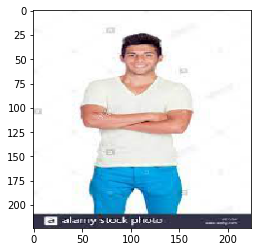

In [17]:
img_path ='/content/newimage.jpg'
img = load_img(img_path,target_size=(size,size,3))
plt.imshow(img)

In [19]:
img=img_to_array(img)
img= img/255.0

Predict the picture


In [22]:
img= img.reshape(1, size, size, 3)

In [23]:
model.predict(img)

array([[0.99949646]], dtype=float32)

In [24]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [34]:
def get_classes(data):
  prob= model.predict(img)[0][0]
  

  if prob <=0.5:
    return 'horse', (1- prob)
  else:
    return 'human',prob

In [35]:
get_classes(img)

('human', 0.99949646)